In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os,sys,gc
pd.set_option("max_columns",300)
pd.set_option("max_rows",300)

In [2]:
train = pd.read_csv("../input/train.csv")

In [3]:
st = pd.read_csv("../input/structures.csv")

In [4]:
train = train.merge(st, left_on=["molecule_name","atom_index_0"], right_on=["molecule_name","atom_index"], 
                    how="left").drop("atom_index",axis=1)

In [5]:
train.rename(columns={"atom":"atom_0","x":"x_0","y":"y_0","z":"z_0"},inplace=True)

In [6]:
train = train.merge(st, left_on=["molecule_name","atom_index_1"], right_on=["molecule_name","atom_index"], 
                    how="left").drop("atom_index",axis=1)

In [7]:
train.rename(columns={"atom":"atom_1","x":"x_1","y":"y_1","z":"z_1"},inplace=True)

In [8]:
mc = pd.read_pickle("../pickle/mulliken_charges.pkl")

In [9]:
mc.head()

,molecule_name,atom_index,mulliken_charge
0,dsgdb9nsd_000001,0,-0.535689
1,dsgdb9nsd_000001,1,0.133921
2,dsgdb9nsd_000001,2,0.133922
3,dsgdb9nsd_000001,3,0.133923
4,dsgdb9nsd_000001,4,0.133923


In [10]:
train = train.merge(mc.rename(columns={"mulliken_charge":"mulliken_charge_0", "atom_index":"atom_index_0"}),
                   on=["molecule_name","atom_index_0"], how="left")
train = train.merge(mc.rename(columns={"mulliken_charge":"mulliken_charge_1", "atom_index":"atom_index_1"}),
                   on=["molecule_name","atom_index_1"], how="left")

In [11]:
train.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,atom_0,x_0,y_0,z_0,atom_1,x_1,y_1,z_1,mulliken_charge_0,mulliken_charge_1
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,H,0.002150,-0.006031,0.001976,C,-0.012698,1.085804,0.008001,0.133921,-0.535689
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,H,0.002150,-0.006031,0.001976,H,1.011731,1.463751,0.000277,0.133921,0.133922
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,H,0.002150,-0.006031,0.001976,H,-0.540815,1.447527,-0.876644,0.133921,0.133923
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543,H,0.002150,-0.006031,0.001976,H,-0.523814,1.437933,0.906397,0.133921,0.133923
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074,H,1.011731,1.463751,0.000277,C,-0.012698,1.085804,0.008001,0.133922,-0.535689


In [12]:
mc = mc.merge(st, on=["molecule_name","atom_index"])

In [13]:
mc.head()

,molecule_name,atom_index,mulliken_charge,atom,x,y,z
0,dsgdb9nsd_000001,0,-0.535689,C,-0.012698,1.085804,0.008001
1,dsgdb9nsd_000001,1,0.133921,H,0.002150,-0.006031,0.001976
2,dsgdb9nsd_000001,2,0.133922,H,1.011731,1.463751,0.000277
3,dsgdb9nsd_000001,3,0.133923,H,-0.540815,1.447527,-0.876644
4,dsgdb9nsd_000001,4,0.133923,H,-0.523814,1.437933,0.906397


[]

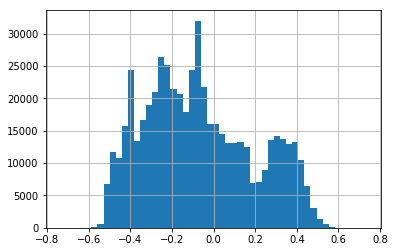

In [15]:
mc[mc.atom=="C"]["mulliken_charge"].hist(bins=50).plot()

[]

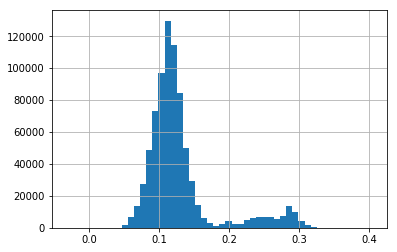

In [16]:
mc[mc.atom=="H"]["mulliken_charge"].hist(bins=50).plot()

[]

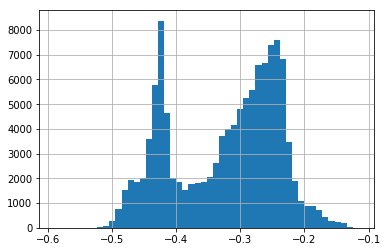

In [17]:
mc[mc.atom=="O"]["mulliken_charge"].hist(bins=50).plot()

[]

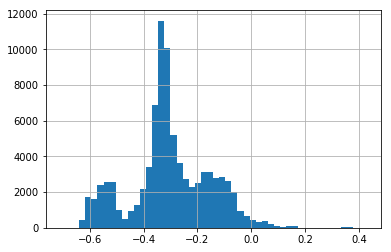

In [18]:
mc[mc.atom=="N"]["mulliken_charge"].hist(bins=50).plot()

[]

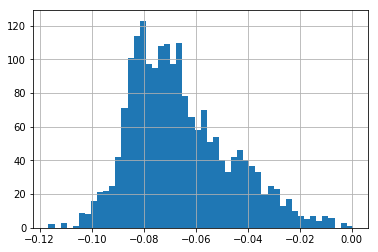

In [19]:
mc[mc.atom=="F"]["mulliken_charge"].hist(bins=50).plot()

In [21]:
mc[mc.molecule_name=="dsgdb9nsd_058982"].sort_values("mulliken_charge")

,molecule_name,atom_index,mulliken_charge,atom,x,y,z
626897,dsgdb9nsd_058982,5,-0.529051,C,-2.001007,-0.890074,-1.106123
626899,dsgdb9nsd_058982,7,-0.425878,O,-4.281228,-1.733262,-1.318604
626892,dsgdb9nsd_058982,0,-0.346164,C,0.095476,1.346818,-0.343641
626895,dsgdb9nsd_058982,3,-0.345258,C,0.707708,-0.227372,1.471726
626900,dsgdb9nsd_058982,8,-0.237155,O,-3.303862,-1.311442,0.726455
626893,dsgdb9nsd_058982,1,-0.138977,N,0.050717,-0.076733,0.139485
626901,dsgdb9nsd_058982,9,-0.099038,C,-2.106616,-0.864266,1.177447
626909,dsgdb9nsd_058982,17,0.068755,H,-1.641378,-0.818234,-2.120022
626902,dsgdb9nsd_058982,10,0.102022,H,-1.964151,-0.790765,2.242588
626903,dsgdb9nsd_058982,11,0.145777,H,1.134504,1.670199,-0.440535
